In [1]:
from fuzzysets import *
from fuzzynumber import *

In [2]:
names = ['A', 'B', 'C', 'D']
values = [0.1, 0.3, 1, 0]
elements = [FuzzyElement(names[i], values[i]) for i in range(len(names))]
set1 = FuzzySet(elements)
print(set1)

| (A, 0.1) || (B, 0.3) || (C, 1) || (D, 0) |


In [3]:
print(set1['C'])

1


| (0.0, 0) || (0.003996003996003996, 0) || (0.007992007992007992, 0) || (0.011988011988011988, 0) || (0.015984015984015984, 0) || (0.01998001998001998, 0) || (0.023976023976023976, 0) || (0.027972027972027972, 0) || (0.03196803196803197, 0) || (0.03596403596403597, 0) || (0.03996003996003996, 0) || (0.04395604395604395, 0) || (0.04795204795204795, 0) || (0.05194805194805195, 0) || (0.055944055944055944, 0) || (0.05994005994005994, 0) || (0.06393606393606394, 0) || (0.06793206793206794, 0) || (0.07192807192807193, 0) || (0.07592407592407592, 0) || (0.07992007992007992, 0) || (0.08391608391608392, 0) || (0.0879120879120879, 0) || (0.0919080919080919, 0) || (0.0959040959040959, 0) || (0.0999000999000999, 0) || (0.1038961038961039, 0) || (0.10789210789210789, 0) || (0.11188811188811189, 0) || (0.11588411588411589, 0) || (0.11988011988011987, 0) || (0.12387612387612387, 0) || (0.12787212787212787, 0) || (0.13186813186813187, 0) || (0.13586413586413587, 0) || (0.13986013986013987, 0) || (0.1

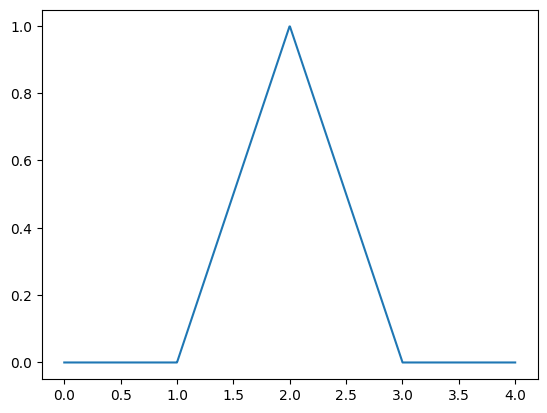

In [5]:
x = tfn(1, 2, 3)
fs = x.toFuzzySet(0, 4)
print(fs)
p = fs.plot()
plt.show()